#**Homework 4**
In this homework, you will develop supervised machine learning models for classification. These models will help to predict if a given building design is energy efficient or not .
We will utilize the energy efficiency dataset ENB2012_data.xlsx from UCI Machine Learning Repository. The complete dataset can be found at https://archive.ics.uci.edu/ml/datasets/Energy+efficiency
Note: I have modified this file for this homework.

The dataset contains eight different parameters used to design a building.They include: \\
X1 - Relative Compactness \\
X2 - Surface Area \\
X3 - Wall Area \\
X4 - Roof Area \\
X5 - Overall Height \\
X6 - Orientation  \\
X7 - Glazing Area  \\
X8 - Glazing Area Distribution \\

Output Variables \\
Y1 - Heating Load  \\
Y2 - Cooling Load

We will consider only heating load (Y1) in this homework. The heating load (Y1) is transformed into a binary variable ( 0 ,1) for the classification task. Heating load is classified as low (0) if it is below or equal to mean and high (1) if it is above the mean. The building is energy efficient if it requies low heating load.

Tasks:

1. Load the dataset, perform exploratory data analysis [that is display top 20 rows using .head()] and observe if there are any special characters in the dataset.

2. Remove the 1st column with label 'Condition', remove the row with all special characters and remove column Y2. Transform the heating load (Y1) into a binary output variable ( i.e., 0 - low heating load; 1 - high heating load) using the sample code in this notebook. Write out a clean dataset (HW4-dataset.csv) with all the input variables and binary output variable for classfication model development.Split the dataset into training(80%) set and testing (20%) set.

3. Develop a logistic regression model using all the input variables (X1 to X8) and binary heating load (Y1) as the output variable. Classify if the building is energy efficient or not using this logistic regression based on the testing dataset. Print out the model coefficients ($\beta$). Calculate the accuracy and create the confusion matrix. Visualize the confusion matrix as a heat map using the Seaborn library. Comment on the results.

4. Repeat the task 3 with support vector machines. Compare the accuracy between different kernel functions: linear, polynomial and radial basis functions.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
#Load the dataset
data = pd.read_excel('/content/drive/MyDrive/MAE495/ENB2012_data.xlsx')  # Correctly specify the file path
data.head(20)

,Condition#,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,$%&,#$#,@@@,???,>>>,Naan,$%&,#$#,@@@,???,>>>
1,1,0.98,514.5,294,110.25,7,2,0,0,15.55,21.33
2,2,0.98,514.5,294,110.25,7,3,0,0,15.55,21.33
3,3,0.98,514.5,294,110.25,7,4,0,0,15.55,21.33
4,4,0.98,514.5,294,110.25,7,5,0,0,15.55,21.33
5,5,0.9,563.5,318.5,122.5,7,2,0,0,20.84,28.28
6,6,0.9,563.5,318.5,122.5,7,3,0,0,21.46,25.38
7,7,0.9,563.5,318.5,122.5,7,4,0,0,20.71,25.16
8,8,0.9,563.5,318.5,122.5,7,5,0,0,19.68,29.6
9,9,0.86,588,294,147,7,2,0,0,19.5,27.3


Perform exploratory data analysis, clean and write out a file. Split the dataset for training and validation

In [ ]:
#drop the columns
data=pd.DataFrame(data)

#axis =1 means drop all the elements in that column, inplace means it shift the other columns accordingly
data.drop('Condition#', axis=1, inplace=True)
data.drop('Y2', axis=1, inplace=True)

data.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,#$#,@@@,???,>>>,Naan,$%&,#$#,@@@,???
1,0.98,514.5,294,110.25,7,2,0,0,15.55
2,0.98,514.5,294,110.25,7,3,0,0,15.55
3,0.98,514.5,294,110.25,7,4,0,0,15.55
4,0.98,514.5,294,110.25,7,5,0,0,15.55
5,0.9,563.5,318.5,122.5,7,2,0,0,20.84
6,0.9,563.5,318.5,122.5,7,3,0,0,21.46
7,0.9,563.5,318.5,122.5,7,4,0,0,20.71
8,0.9,563.5,318.5,122.5,7,5,0,0,19.68
9,0.86,588,294,147,7,2,0,0,19.5


In [ ]:
#drop the first row containing special characters
data.drop(data.index[0], axis=0, inplace=True)
data.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
2,0.98,514.5,294,110.25,7,3,0,0,15.55
3,0.98,514.5,294,110.25,7,4,0,0,15.55
4,0.98,514.5,294,110.25,7,5,0,0,15.55
5,0.9,563.5,318.5,122.5,7,2,0,0,20.84
6,0.9,563.5,318.5,122.5,7,3,0,0,21.46
7,0.9,563.5,318.5,122.5,7,4,0,0,20.71
8,0.9,563.5,318.5,122.5,7,5,0,0,19.68
9,0.86,588,294,147,7,2,0,0,19.5
10,0.86,588,294,147,7,3,0,0,19.95
11,0.86,588,294,147,7,4,0,0,19.34


In [ ]:
#Sample code for converting the Y1 into a binary variable
#thresholding is done using the mean of the column

data.loc[data.Y1 <= 22.3, "Y1"] = 0
data.loc[data.Y1 >22.3, "Y1"] = 1

data.to_csv("HW4-dataset.csv")

In [ ]:
#Data splitting

# import functions
from pandas import read_csv
from sklearn.model_selection import train_test_split  #importing the train_test_split function from the sklearn library

# load the dataset
data = read_csv('HW4-dataset.csv', header=0, index_col=0, parse_dates=True)
values = data.values

#define input variables (X1, X2, X3, X4, X5, X6, X7, X8) and output variable (Y1)
inputs = values[:, :-1]
output = values[:, -1]

# separate the data into input variables  and output variable
X, y = inputs, output  # X contains all the input variables, y contains the output; the last column is the output variable

# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=1)

In [ ]:
print(trainX)
print(trainy)

[[9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 5.000e+00 0.000e+00 0.000e+00]
 ...
 [6.900e-01 7.350e+02 2.940e+02 ... 5.000e+00 4.000e-01 2.000e+00]
 [6.600e-01 7.595e+02 3.185e+02 ... 2.000e+00 4.000e-01 2.000e+00]
 [6.600e-01 7.595e+02 3.185e+02 ... 3.000e+00 4.000e-01 2.000e+00]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1

In [ ]:
#Logistic regression model

#import the necessary functions
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#define an instance of the LogisticRegression class
model = LogisticRegression(penalty="l2",C=1.0,fit_intercept=True,max_iter=1000)

'''
penalty= the regularization applied on the model. 'l1' or 'l2'
C= the inverse of regularization strength
fit_intercept= have the beta0 term as well in the equation
max_iter= maximum number of iterations
'''

# fit the model on the training set
model.fit(trainX, trainy) # fit function determines the coefficients using the maximum likelihood estimate (MLE) method.

# predict the test set using the test data
yhat = model.predict(testX)

#display the output classes of the model
model.classes_

array([0., 1.])

Classify if the building is energy efficient or not using this logistic regression based on the testing dataset.

The building is classified as energy efficient or not using the logiistic regression model. This is shown below in the heat map, where more than half of the building designs are considered energy efficiient, because their heating loads (Y1) are 1, or above the efficiency paramter of 22.3.

In [ ]:
#print out the model parameters beta_i
print(model.intercept_)
print()
print("Model coefficients, beta, are:")
print(model.coef_)

[-30.64555361]

Model coefficients, beta, are:
[[-0.08592806 -0.00671299  0.04146218 -0.02408758  3.5784798  -0.05738521
   1.28372913  2.19246562]]


In [ ]:
# evaluate model accuracy.
#The arguments are true values testy and predicted values yhat
score = accuracy_score(testy, yhat)
print("Model accuracy is:", score)


Model accuracy is: 1.0


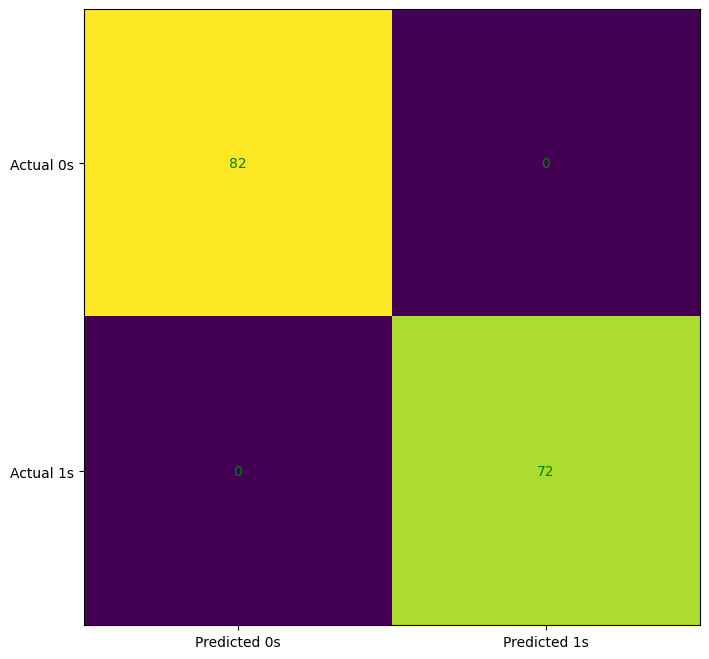

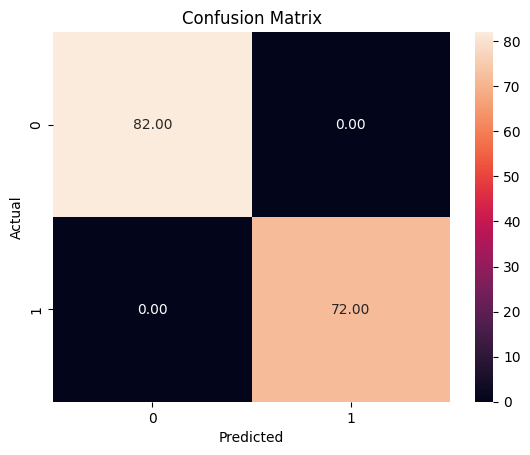

In [49]:
#build a confusion matrix to better understand the result.

#import confusion matrix function
from sklearn.metrics import confusion_matrix

#use the function with arguments-true output (testy) and predicted output (yhat)
conf_mat = confusion_matrix(testy, yhat)

conf_mat

#visualize the confusion matrix as a heat map (not using Seaborn Library)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat) #imshow is the image show function
ax.grid(False) # disable the grid lines

#divide the plot into 4 sections
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='green')
plt.show()

#Visualize the confusion matrix as a heat map using the Seaborn library.

#import seaborn library
import seaborn as sns

#visualize confusion matrix as a heat map using Seaborn Library
sns.heatmap(conf_mat, annot=True, fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model accuracy is: 1.0


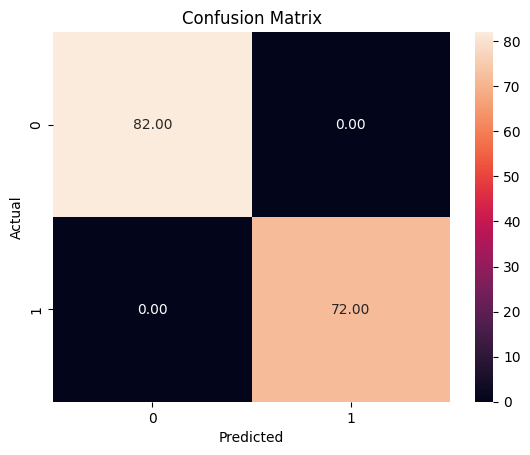

In [ ]:
#Support vector machines - Linear Kernel

#import svm function from the sklearn library
from sklearn import svm

#define an instance of the Linear SVM class
model = svm.SVC(kernel='linear',C=1,max_iter=1000) #define an instance of SVC class

#fit the model on train data and label
model.fit(trainX,trainy)

#print out the support vectors
model.support_vectors_

#predict the output using the trained model
yhat = model.predict(testX)

#evaluate model accuracy.
score = accuracy_score(testy, yhat)
print("Model accuracy is:", score)

#build a confusion matrix to better understand the result

#import confusion matrix function
from sklearn.metrics import confusion_matrix

#use the function with arguments-true output and predicted output
conf_mat = confusion_matrix(testy, yhat)
conf_mat

#Visualize the confusion matrix as a heat map using the Seaborn library.

#import seaborn library
import seaborn as sns

#visualize confusion matrix as a heat map using Seaborn Library
sns.heatmap(conf_mat, annot=True, fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Model accuracy is: 1.0


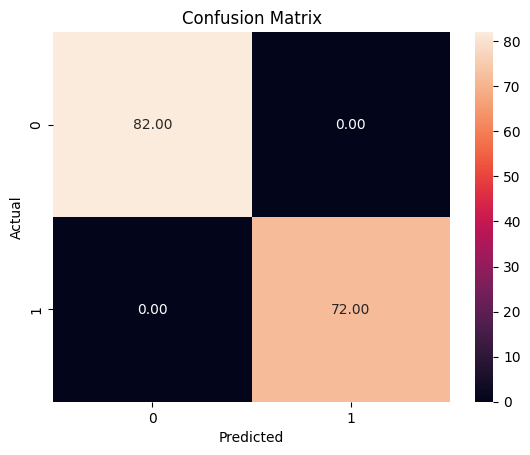

In [ ]:
#Support vector machines - Polynomial Kernel

#import svm function from the sklearn library
from sklearn import svm

#define an instance of the Polynomial SVM class
model = svm.SVC(kernel='poly',degree=2,C=1,max_iter=1000) #define an instance of SVC class

#fit the model on train data and label
model.fit(trainX,trainy)

#print out the support vectors
model.support_vectors_

#predict the output using the trained model
yhat = model.predict(testX)

#evaluate model accuracy.
score = accuracy_score(testy, yhat)
print("Model accuracy is:", score)

#build a confusion matrix to better understand the result
from sklearn.metrics import confusion_matrix

#use the function with arguments-true output and predicted output
conf_mat = confusion_matrix(testy, yhat)
conf_mat

#Visualize the confusion matrix as a heat map using the Seaborn library.

#import seaborn library
import seaborn as sns

#visualize confusion matrix as a heat map using Seaborn Library
sns.heatmap(conf_mat, annot=True, fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Model accuracy is: 1.0


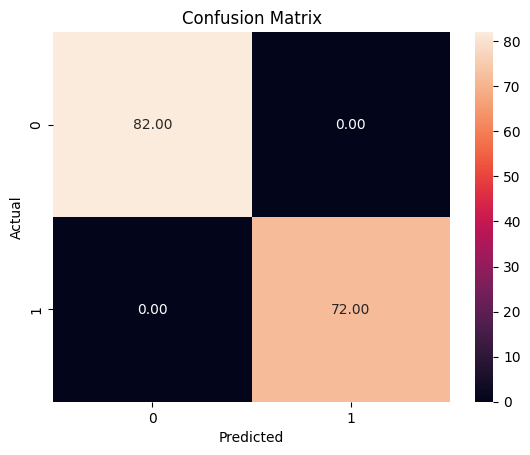

In [ ]:
#Support vector machines-RBF Kernel

#import svm function from the sklearn library
from sklearn import svm

#define an instance of the SVC class
model = svm.SVC(kernel='rbf',C=1,max_iter=1000)

#fit the model on train data and label
model.fit(trainX,trainy)

#predict the output using the trained model
yhat = model.predict(testX)

#evaluate model accuracy.
score = accuracy_score(testy, yhat)
print("Model accuracy is:", score)

#build a confusion matrix to better understand the result
from sklearn.metrics import confusion_matrix

#use the function with arguments-true output and predicted output
conf_mat = confusion_matrix(testy, yhat)
conf_mat

#Visualize the confusion matrix as a heat map using the Seaborn library.

#import seaborn library
import seaborn as sns

#visualize confusion matrix as a heat map using Seaborn Library
sns.heatmap(conf_mat, annot=True, fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The three confusion matrices are identical. This tells us that the different kernel functions (linear, polynomial, radial basis) are equally accurate, at least for this dataset. This can all be seen due to the fact that the printed accuracy scores are all equal.